# Tutorial - Step1: MTMR pretraining with both contractive and margin losses

## 1. Import requirements

In [1]:
import os
import sys
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt

In [2]:
sys.path = [os.path.abspath(os.path.join(os.getcwd(), os.pardir))] + sys.path

In [3]:
from MTMR.dataset import TrainingSmilesDataset, ValidationSmilesDataset
from MTMR.vae import SmilesAutoencoder

## 2. Configure GPU (if available)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

cuda:0


## 3. Specify a target property

In [5]:
PROPERTY_NAME = "drd2"
TEST_NUM = "11"

## 4. Set directories (for inputs and outputs)

In [6]:
input_dir = os.path.abspath(os.path.join(os.pardir, "DATA", PROPERTY_NAME))

In [7]:
output_dir = f"outputs_5-1_{PROPERTY_NAME.upper()}_pretraining_{TEST_NUM}"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 5. Set file names

In [8]:
filepath_train = os.path.join(input_dir, "rdkit_train_triplet.txt")
filepath_valid = os.path.join(input_dir, "rdkit_valid.txt")

In [9]:
filepath_char2idx      = os.path.join(output_dir, "char2idx.csv")
filepath_configs       = os.path.join(output_dir, "configs.csv")
filepath_checkpoint    = os.path.join(output_dir, "checkpoints.pt")
filepath_history       = os.path.join(output_dir, "history.csv")
filepath_history_valid = os.path.join(output_dir, "history_valid.csv")

## 6. Load datasets (for training and validation)

In [10]:
dataset = TrainingSmilesDataset(filepath_train, device=device)
dataset.save_char2idx(filepath_char2idx)
dataset_valid = ValidationSmilesDataset(filepath_valid, filepath_char2idx, device=device)

## 7. Initialize a generator of MTMR

In [11]:
## Model configuration
model_configs = {"hidden_size":128,
                 "latent_size":128,
                 "num_layers" :2,
                 "vocab_size" :dataset.vocab_size,
                 "sos_idx"    :dataset.sos_idx,
                 "eos_idx"    :dataset.eos_idx,
                 "pad_idx"    :dataset.pad_idx,
                 "device"     :device
                }

## Model initialization
generator = SmilesAutoencoder(**model_configs)

## Configuration save
generator.save_config(filepath_configs)

## 8. Train

In [12]:
df_history, df_history_valid = generator.fit(dataset,
                                             validation_dataset=dataset_valid,
                                             use_contractive=True,
                                             use_margin=True,
                                             checkpoint_filepath=filepath_checkpoint)

df_history.to_csv(filepath_history, index=False)
df_history_valid.to_csv(filepath_history_valid, index=False)

[00000000/00100000]  loss(tr): 3.453  loss_recon_src(tr): 3.448  loss_recon_tar(tr): 3.456  loss_recon_neg(tr): 3.455  loss_contractive(tr): 0.411  loss_margin(tr): 1.996  beta: 0.000  gamma: 0.000  valid_ratio(va): 0.110  similarity(va): 0.003
[00001000/00100000]  loss(tr): 0.520  loss_recon_src(tr): 0.559  loss_recon_tar(tr): 0.381  loss_recon_neg(tr): 0.501  loss_contractive(tr): 1.597  loss_margin(tr): 0.260  beta: 0.020  gamma: 0.020  valid_ratio(va): 0.978  similarity(va): 0.177
[00002000/00100000]  loss(tr): 0.405  loss_recon_src(tr): 0.402  loss_recon_tar(tr): 0.226  loss_recon_neg(tr): 0.372  loss_contractive(tr): 1.330  loss_margin(tr): 0.370  beta: 0.040  gamma: 0.040  valid_ratio(va): 0.974  similarity(va): 0.215
[00003000/00100000]  loss(tr): 0.376  loss_recon_src(tr): 0.383  loss_recon_tar(tr): 0.162  loss_recon_neg(tr): 0.307  loss_contractive(tr): 1.177  loss_margin(tr): 0.319  beta: 0.060  gamma: 0.060  valid_ratio(va): 0.990  similarity(va): 0.262
[00004000/00100000] 

[00034000/00100000]  loss(tr): 0.382  loss_recon_src(tr): 0.159  loss_recon_tar(tr): 0.027  loss_recon_neg(tr): 0.079  loss_contractive(tr): 0.340  loss_margin(tr): 0.092  beta: 0.680  gamma: 0.680  valid_ratio(va): 1.000  similarity(va): 0.380
[00035000/00100000]  loss(tr): 0.342  loss_recon_src(tr): 0.133  loss_recon_tar(tr): 0.028  loss_recon_neg(tr): 0.066  loss_contractive(tr): 0.255  loss_margin(tr): 0.127  beta: 0.700  gamma: 0.700  valid_ratio(va): 0.998  similarity(va): 0.377
[00036000/00100000]  loss(tr): 0.401  loss_recon_src(tr): 0.116  loss_recon_tar(tr): 0.031  loss_recon_neg(tr): 0.069  loss_contractive(tr): 0.301  loss_margin(tr): 0.156  beta: 0.720  gamma: 0.720  valid_ratio(va): 0.998  similarity(va): 0.385
[00037000/00100000]  loss(tr): 0.393  loss_recon_src(tr): 0.124  loss_recon_tar(tr): 0.043  loss_recon_neg(tr): 0.114  loss_contractive(tr): 0.291  loss_margin(tr): 0.112  beta: 0.740  gamma: 0.740  valid_ratio(va): 1.000  similarity(va): 0.400
[00038000/00100000] 

[00068000/00100000]  loss(tr): 0.372  loss_recon_src(tr): 0.111  loss_recon_tar(tr): 0.027  loss_recon_neg(tr): 0.069  loss_contractive(tr): 0.204  loss_margin(tr): 0.099  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.400
[00069000/00100000]  loss(tr): 0.459  loss_recon_src(tr): 0.113  loss_recon_tar(tr): 0.021  loss_recon_neg(tr): 0.064  loss_contractive(tr): 0.290  loss_margin(tr): 0.103  beta: 1.000  gamma: 1.000  valid_ratio(va): 0.996  similarity(va): 0.390
[00070000/00100000]  loss(tr): 0.383  loss_recon_src(tr): 0.117  loss_recon_tar(tr): 0.029  loss_recon_neg(tr): 0.056  loss_contractive(tr): 0.241  loss_margin(tr): 0.076  beta: 1.000  gamma: 1.000  valid_ratio(va): 0.998  similarity(va): 0.378
[00071000/00100000]  loss(tr): 0.478  loss_recon_src(tr): 0.104  loss_recon_tar(tr): 0.020  loss_recon_neg(tr): 0.068  loss_contractive(tr): 0.301  loss_margin(tr): 0.113  beta: 1.000  gamma: 1.000  valid_ratio(va): 0.998  similarity(va): 0.416
[00072000/00100000] 

## 9. Visualize for loss analysis

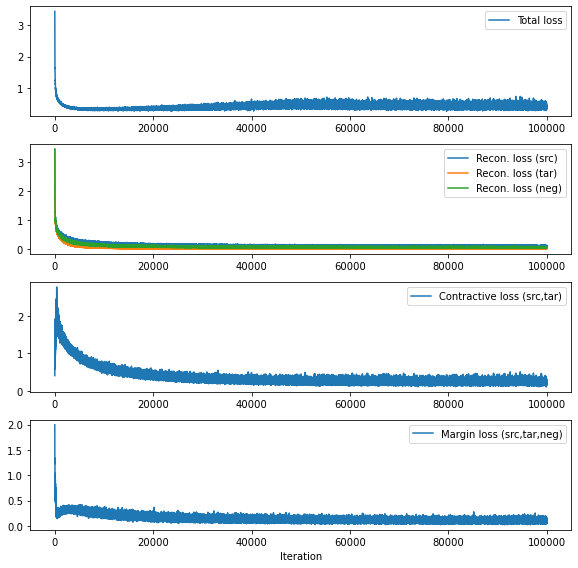

In [13]:
fig, axes = plt.subplots(4,1,figsize=(8,8))

axes[0].plot(df_history.loc[:,"LOSS_TOTAL"], label="Total loss")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_SOURCE"], label="Recon. loss (src)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_TARGET"], label="Recon. loss (tar)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_NEGATIVE"], label="Recon. loss (neg)")
axes[2].plot(df_history.loc[:,"LOSS_CONTRACTIVE"], label="Contractive loss (src,tar)")
axes[3].plot(df_history.loc[:,"LOSS_MARGIN"], label="Margin loss (src,tar,neg)")

axes[3].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

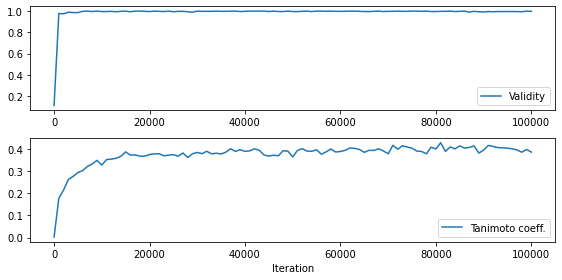

In [14]:
fig, axes = plt.subplots(2,1,figsize=(8,4))

axes[0].plot(df_history_valid.loc[:,"VALID_RATIO"], label="Validity")
axes[1].plot(df_history_valid.loc[:,"AVERAGE_SIMILARITY"], label="Tanimoto coeff.")

axes[1].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()